<a href="https://colab.research.google.com/github/XTMay/python-data-science-course/blob/main/notebooks/Lec_9_10_Introduction_to_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson_09 Matplotlib 介绍

https://matplotlib.org/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

def setup_chinese_font():
    """设置中文字体显示，适配不同操作系统"""
    system = platform.system()
    print(f"检测到操作系统: {system}")

    # 重建字体缓存（可选，首次运行时有用）
    try:
        fm._rebuild()
    except:
        pass

    if system == "Darwin":  # macOS
        # macOS 优先字体列表
        mac_fonts = [
            'PingFang SC',           # 苹方简体
            'Hiragino Sans GB',      # 冬青黑体简体中文
            'STHeiti',               # 华文黑体
            'Heiti SC',              # 黑体-简
            'Arial Unicode MS',      # Arial Unicode MS
            'SimHei'                 # 黑体（如果安装了）
        ]
        fonts_to_try = mac_fonts
    elif system == "Windows":
        fonts_to_try = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']
    else:  # Linux
        fonts_to_try = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'DejaVu Sans']

    # 获取系统可用字体
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"系统中找到 {len(available_fonts)} 个字体")

    # 设置字体
    font_found = False
    for font_name in fonts_to_try:
        if font_name in available_fonts:
            plt.rcParams['font.sans-serif'] = [font_name] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
            print(f"成功设置字体: {font_name}")
            font_found = True
            break

    if not font_found:
        # 备选方案：搜索包含中文关键词的字体
        chinese_fonts = [f for f in available_fonts if any(keyword in f.lower()
                        for keyword in ['pingfang', 'hiragino', 'stheiti', 'heiti', 'han'])]
        if chinese_fonts:
            plt.rcParams['font.sans-serif'] = [chinese_fonts[0]] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"使用备选中文字体: {chinese_fonts[0]}")
            font_found = True

    if not font_found:
        print("警告: 未找到合适的中文字体，中文可能显示为方块")
        plt.rcParams['axes.unicode_minus'] = False

    # 显示当前字体设置
    print(f"当前字体设置: {plt.rcParams['font.sans-serif'][:2]}")
    return font_found

# 执行字体设置
setup_chinese_font()
print("中文字体配置完成!")

检测到操作系统: Darwin
系统中找到 464 个字体
成功设置字体: Hiragino Sans GB
当前字体设置: ['Hiragino Sans GB', 'DejaVu Sans']
中文字体配置完成!


In [ ]:
import pandas as pd

# Load the dataset from a public URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

## 数据准备

确保 Titanic 数据集已加载并可用，并对需要用于可视化的数据进行必要的预处理。


In [ ]:
# 确认 DataFrame 已加载
print("DataFrame loaded successfully.")

DataFrame loaded successfully.


In [ ]:
# 查看前几行和数据类型
print("\nFirst 5 rows of the DataFrame:")
display(df.head())


First 5 rows of the DataFrame:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("\nData types of the DataFrame:")
display(df.info())


Data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [ ]:
# 识别需要用于可视化的列并进行预处理
# 对于 Age 列，填充缺失值，这里使用中位数填充
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    print("\nMissing values in 'Age' filled with median.")


Missing values in 'Age' filled with median.


/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_77786/538456782.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# 对于 Fare 列，填充缺失值（如果存在），这里使用中位数填充
if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    print("\nMissing values in 'Fare' filled with median.")


Missing values in 'Fare' filled with median.


/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_77786/1375492613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [ ]:
# 对于 Embarked 列，填充缺失值（如果存在），这里使用众数填充
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    print("\nMissing values in 'Embarked' filled with mode.")


Missing values in 'Embarked' filled with mode.


/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_77786/3995873357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
# 检查预处理后的缺失值情况
print("\nMissing values after preprocessing:")
display(df.isnull().sum())


Missing values after preprocessing:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# 确认数据类型是否适合后续可视化
print("\nData types after preprocessing:")
display(df.dtypes)


Data types after preprocessing:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Matplotlib 基础


Figure object: Figure(640x480)
Axes object: Axes(0.125,0.11;0.775x0.77)


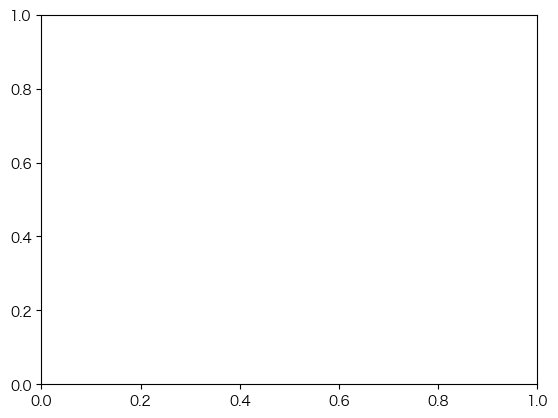

In [ ]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

# Add an axes object to the figure
ax = fig.add_subplot(111)

# Display the figure and axes objects (optional, for demonstration)
print("Figure object:", fig)
print("Axes object:", ax)

### 图形（Figure）和坐标轴（Axes）对象的解释：
在 Matplotlib 中，Figure 是所有绘图元素的顶层容器。

它就像绘图的画布或窗口，所有图形都会绘制在这个区域上。
可以把它理解为绘图的整体区域。

Axes（或子图 Subplot）是实际绘制数据的地方。

一个 Figure 可以包含一个或多个 Axes 对象。

每个 Axes 对象代表 Figure 中的一个单独的图或坐标系。

- add_subplot() 方法用于向 Figure 添加 Axes。
- add_subplot() 的参数（例如 111）定义了子图的网格布局。

111 表示 1x1 的网格，这是第一个子图。

你可以直接在 Axes 对象上绘制数据。
例如，在之前创建的 'ax' 对象上绘制：


```
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.set_xlabel('X 轴标签')
ax.set_ylabel('Y 轴标签')
ax.set_title('示例图')
```


Figure 对象适合设置整个图形的属性，
例如整体标题、或者将图形保存为文件。

Axes 对象用于绘制数据、设置坐标轴标签、子图标题、
添加图例，以及其他与单个图相关的元素。

Figure 与 Axes 的这种基本结构是使用 Matplotlib 创建图形的核心概念。

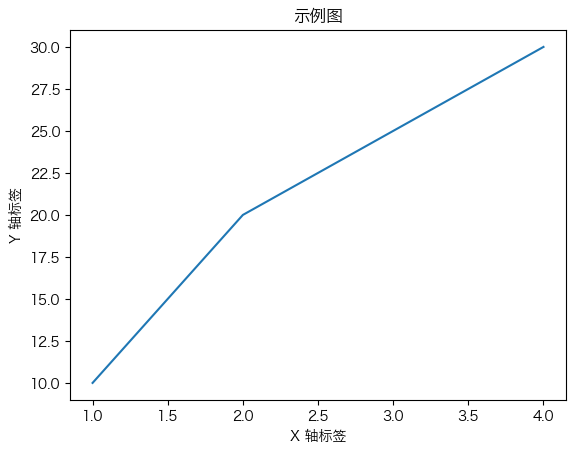

In [ ]:
# Create a figure
fig = plt.figure()

# Add an axes object to the figure
ax = fig.add_subplot(111)

ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.set_xlabel('X 轴标签')
ax.set_ylabel('Y 轴标签')
ax.set_title('示例图')

# plt.figlegend('L')

plt.show()

在 fig.add_subplot(111) 中，111 是一个简写，表示子图的网格布局。它的意思是：

```
第一个数字 (1): 图表中有 1 行子图。
第二个数字 (1): 图表中有 1 列子图。
第三个数字 (1): 这个子图是网格中的第 1 个子图。
所以，fig.add_subplot(111) 表示在 1x1 的网格中创建一个子图，并且这个子图是唯一的那个。
```
如果你想创建一个 2x2 的子图网格，并选择右上角的那个子图，你可以使用 fig.add_subplot(222)，其中：
```
第一个数字 (2): 2 行
第二个数字 (2): 2 列
第三个数字 (2): 第二个子图（从左到右，从上到下计数）
```

Figure object: Figure(800x600)
Axes objects: [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


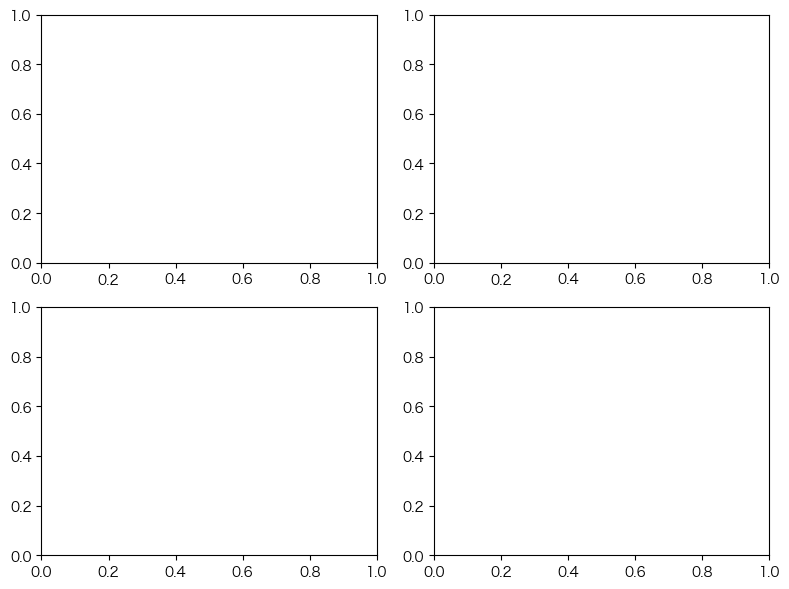

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a 2x2 grid of axes objects
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Display the figure and axes objects (optional, for demonstration)
print("Figure object:", fig)
print("Axes objects:", axes)

# You can access individual axes using indexing, e.g., axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
# For example, to add a title to the top-left subplot:
# axes[0, 0].set_title('Top Left Subplot')

plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show()

## 添加标题和轴标签

学习如何为图表和轴添加主标题和标签，以及如何自定义它们的字体、大小和位置。


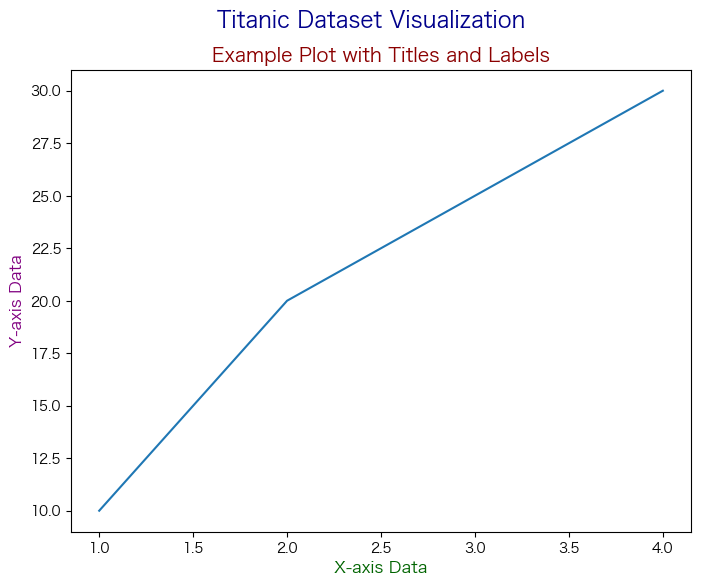

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig = plt.figure(figsize=(8, 6))  # Added figsize for better visualization
ax = fig.add_subplot(111)

# Add a main title to the figure with custom font size and color
fig.suptitle('Titanic Dataset Visualization', fontsize=16, color='darkblue')

# Add a title to the axes object with custom font size and color
ax.set_title('Example Plot with Titles and Labels', fontsize=14, color='darkred')

# Add a label to the x-axis with custom font size and color
ax.set_xlabel('X-axis Data', fontsize=12, color='darkgreen')

# Add a label to the y-axis with custom font size and color
ax.set_ylabel('Y-axis Data', fontsize=12, color='purple')

# Optional: Add some dummy data to show the axes
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Display the plot
plt.show()

## 在图表中添加文本

学习如何在图表的任意位置添加文本注释，例如在特定数据点旁边添加标签，或者在图表中添加描述性文本。


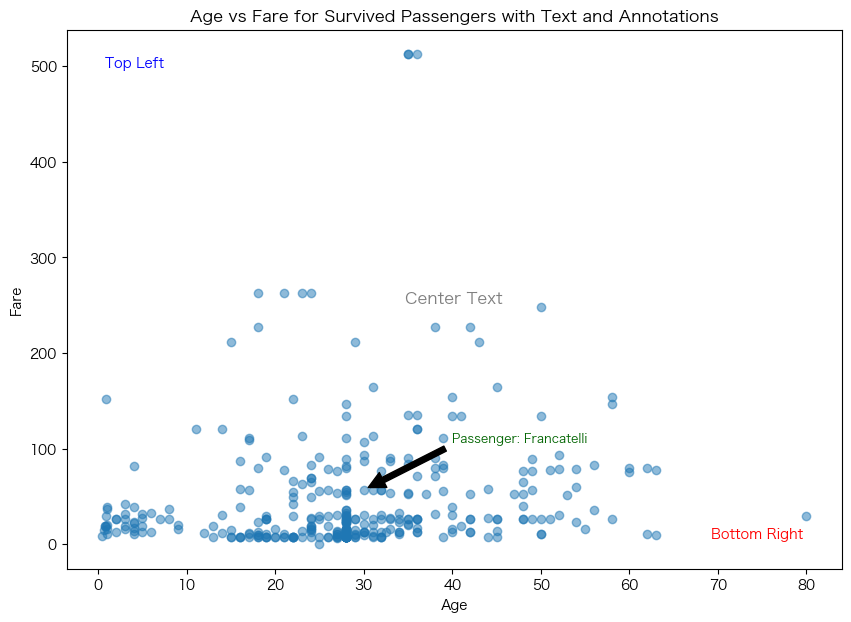

In [ ]:
import matplotlib.pyplot as plt

# 2. Create a figure and an axes object
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# Plot some data from the Titanic dataset for annotation
# Using Age and Fare for passengers who survived
survived_df = df[df['Survived'] == 1]
ax.scatter(survived_df['Age'], survived_df['Fare'], alpha=0.5)

# Set plot labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Age vs Fare for Survived Passengers with Text and Annotations')

# 3. Use ax.text() to add text at different locations
# Add text in the center of the plot
ax.text(0.5, 0.5, 'Center Text', transform=ax.transAxes,
        fontsize=12, color='gray', ha='center', va='center')

# Add text in the top left corner
ax.text(0.05, 0.95, 'Top Left', transform=ax.transAxes,
        fontsize=10, color='blue', ha='left', va='top')

# Add text in the bottom right corner
ax.text(0.95, 0.05, 'Bottom Right', transform=ax.transAxes,
        fontsize=10, color='red', ha='right', va='bottom')

# 4. Use ax.annotate() to add text linked to a specific data point
# Choose a specific data point to annotate (e.g., a passenger with Age around 30 and Fare around 50)
# Find a data point close to these values
point_to_annotate = survived_df[(survived_df['Age'] > 28) & (survived_df['Age'] < 32) & (survived_df['Fare'] > 40) & (survived_df['Fare'] < 60)].iloc[0]

# 5. & 6. Customize the appearance of the added text and arrow
ax.annotate(f"Passenger: {point_to_annotate['Name'].split(',')[0]}",
            xy=(point_to_annotate['Age'], point_to_annotate['Fare']),  # Data point coordinates
            xytext=(point_to_annotate['Age'] + 10, point_to_annotate['Fare'] + 50), # Text coordinates
            arrowprops=dict(facecolor='black', shrink=0.05), # Arrow properties
            fontsize=9, color='darkgreen', fontweight='bold') # Text properties

# 7. Display the plot
plt.show()

## 文本框和箭头

学习如何使用文本框突出显示文本，以及如何使用箭头将文本连接到图表中的特定元素。


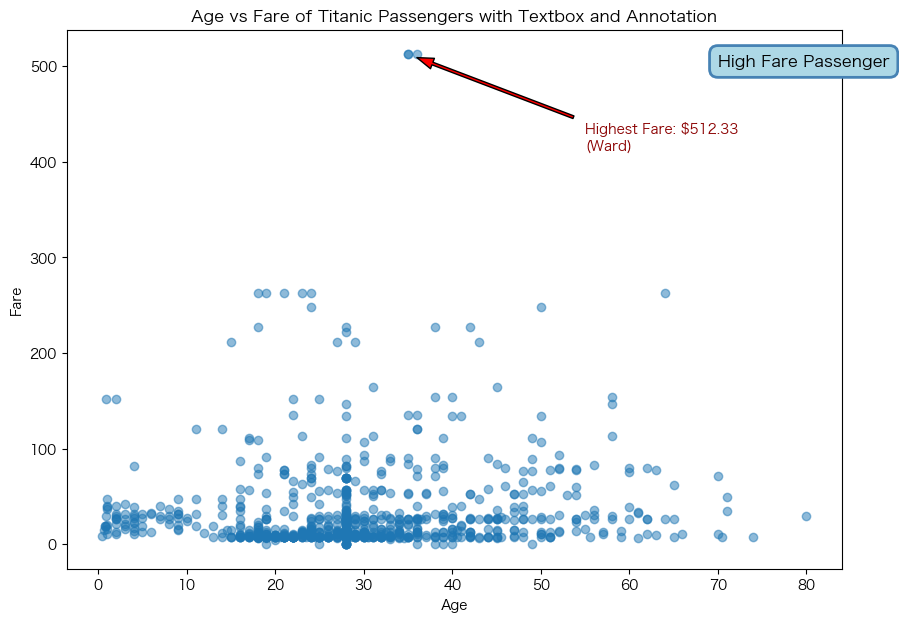

In [ ]:
import matplotlib.pyplot as plt

# 1. 创建一个 Matplotlib 图形和轴对象。
fig, ax = plt.subplots(figsize=(10, 7))

# 2. 绘制一些数据，例如使用 Titanic 数据集中年龄和票价的数据点。
# 使用所有乘客的数据点
ax.scatter(df['Age'], df['Fare'], alpha=0.5)

# Set plot labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Age vs Fare of Titanic Passengers with Textbox and Annotation')

# 3. 使用 ax.text() 方法在图表中的某个位置添加文本，并使用 bbox 参数创建一个文本框来突出显示该文本。
# 尝试自定义文本框的样式，例如背景颜色、边框颜色和边框样式。
ax.text(70, 500, 'High Fare Passenger',
        fontsize=12, color='black',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', ec='steelblue', lw=2))

# 4. 使用 ax.annotate() 方法在图表中的某个数据点添加注释，并使用 arrowprops 参数自定义连接文本和数据点的箭头的样式。
# 例如箭头的颜色、宽度和样式。
# Find a specific data point to annotate - let's find the passenger with the highest fare
highest_fare_passenger = df.loc[df['Fare'].idxmax()]

ax.annotate(f"Highest Fare: ${highest_fare_passenger['Fare']:.2f}\n({highest_fare_passenger['Name'].split(',')[0]})",
            xy=(highest_fare_passenger['Age'], highest_fare_passenger['Fare']), # Data point coordinates
            xytext=(highest_fare_passenger['Age'] + 20, highest_fare_passenger['Fare'] - 100), # Text coordinates (adjusted to avoid overlap)
            fontsize=10, color='darkred',
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8)) # Custom arrow properties

# 5. 显示图表以查看添加的文本框和箭头效果。
plt.show()

## 文本的对齐和旋转

学习如何控制文本的对齐方式（水平和垂直）以及如何旋转文本。


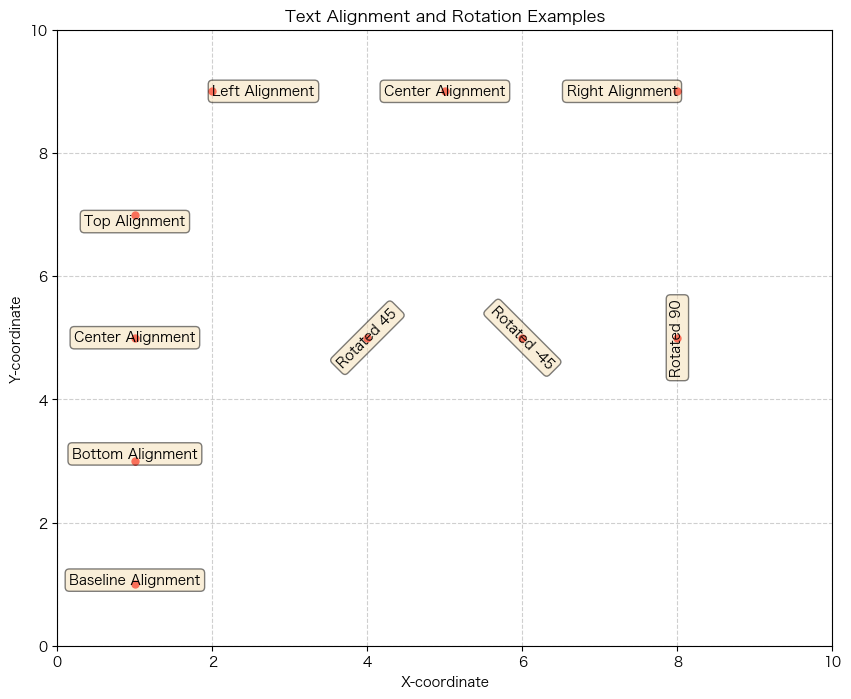

In [ ]:
import matplotlib.pyplot as plt

# 1. 创建一个新的 Matplotlib 图形和轴对象。
fig, ax = plt.subplots(figsize=(10, 8))

# Set plot limits for better visualization of text placement
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title('Text Alignment and Rotation Examples')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.grid(True, linestyle='--', alpha=0.6)

# Helper function to add text and a marker
def add_text_example(x, y, text, ha, va, rotation=0):
    ax.text(x, y, text, ha=ha, va=va, rotation=rotation,
            fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))
    ax.plot(x, y, 'o', color='red', markersize=5) # Add a marker at the text origin

# 2. 尝试不同的水平对齐方式 ('left', 'center', 'right')。
add_text_example(2, 9, 'Left Alignment', ha='left', va='center')
add_text_example(5, 9, 'Center Alignment', ha='center', va='center')
add_text_example(8, 9, 'Right Alignment', ha='right', va='center')

# 3. 尝试不同的垂直对齐方式 ('top', 'center', 'bottom', 'baseline')。
add_text_example(1, 7, 'Top Alignment', ha='center', va='top')
add_text_example(1, 5, 'Center Alignment', ha='center', va='center')
add_text_example(1, 3, 'Bottom Alignment', ha='center', va='bottom')
add_text_example(1, 1, 'Baseline Alignment', ha='center', va='baseline')

# 4. 使用 rotation 参数来旋转文本，尝试不同的旋转角度。
add_text_example(4, 5, 'Rotated 45', ha='center', va='center', rotation=45)
add_text_example(6, 5, 'Rotated -45', ha='center', va='center', rotation=-45)
add_text_example(8, 5, 'Rotated 90', ha='center', va='center', rotation=90)

# 5. (Optional, included in the helper function)

# 6. 显示图表。
plt.show()

## 文本的数学表达式

学习如何在 Matplotlib 图表中使用 LaTeX 语法添加数学表达式。


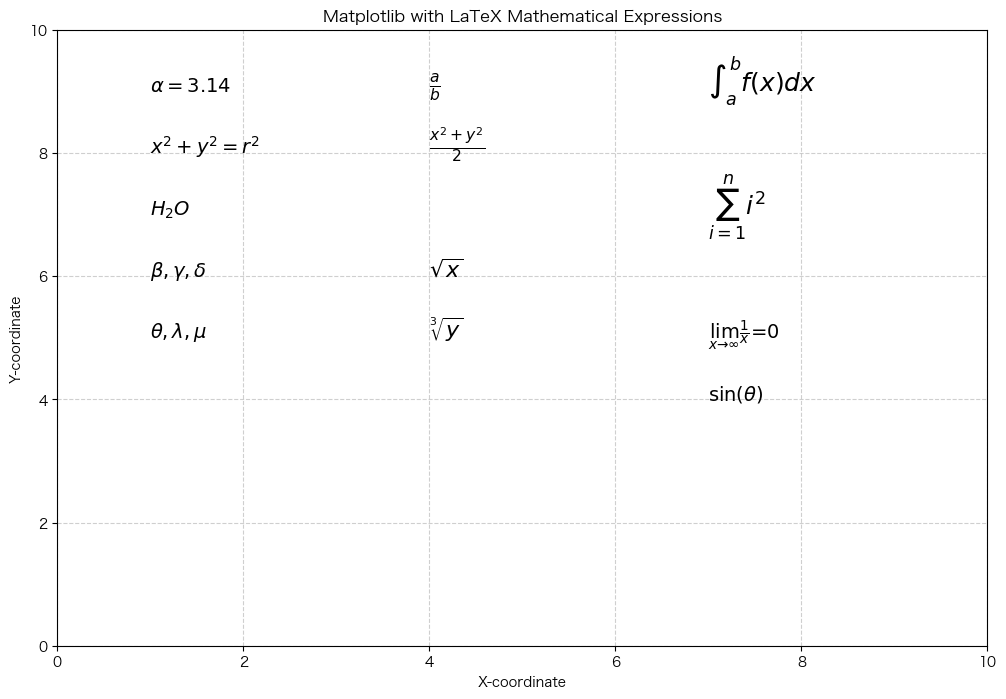

In [ ]:
import matplotlib.pyplot as plt

# 1. 创建一个新的 Matplotlib 图形和轴对象。
fig, ax = plt.subplots(figsize=(12, 8))

# Set plot limits for better visualization of text placement
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title('Matplotlib with LaTeX Mathematical Expressions')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.grid(True, linestyle='--', alpha=0.6)

# 2. 在图表中使用 ax.text() 方法添加包含数学表达式的文本。
# 3. 确保在字符串前面加上 r 来表示原始字符串，以正确解析 LaTeX 语法。
# 4. 尝试使用不同的 LaTeX 语法来表示常见的数学符号、上下标、分数、积分等。

# Simple symbols and superscripts/subscripts
ax.text(1, 9, r'$\alpha = 3.14$', fontsize=14)
ax.text(1, 8, r'$x^2 + y^2 = r^2$', fontsize=14)
ax.text(1, 7, r'$H_2O$', fontsize=14)

# Fractions
ax.text(4, 9, r'$\frac{a}{b}$', fontsize=16)
ax.text(4, 8, r'$\frac{x^2 + y^2}{2}$', fontsize=16)

# Integrals and sums
ax.text(7, 9, r'$\int_a^b f(x) dx$', fontsize=18)
ax.text(7, 7, r'$\sum_{i=1}^n i^2$', fontsize=18)

# Roots
ax.text(4, 6, r'$\sqrt{x}$', fontsize=16)
ax.text(4, 5, r'$\sqrt[3]{y}$', fontsize=16)

# Greek letters
ax.text(1, 6, r'$\beta, \gamma, \delta$', fontsize=14)
ax.text(1, 5, r'$\theta, \lambda, \mu$', fontsize=14)

# Other common expressions
ax.text(7, 5, r'$\lim_{x \to \infty} \frac{1}{x} = 0$', fontsize=14)
ax.text(7, 4, r'$\sin(\theta)$', fontsize=14)

# 5. 显示图表以查看数学表达式的渲染效果。
plt.show()

## 使用字体管理器

学习如何管理和使用不同的字体。


Found 434 TrueType fonts on the system.
Using font file: /System/Library/Fonts/Supplemental/Arial Bold Italic.ttf


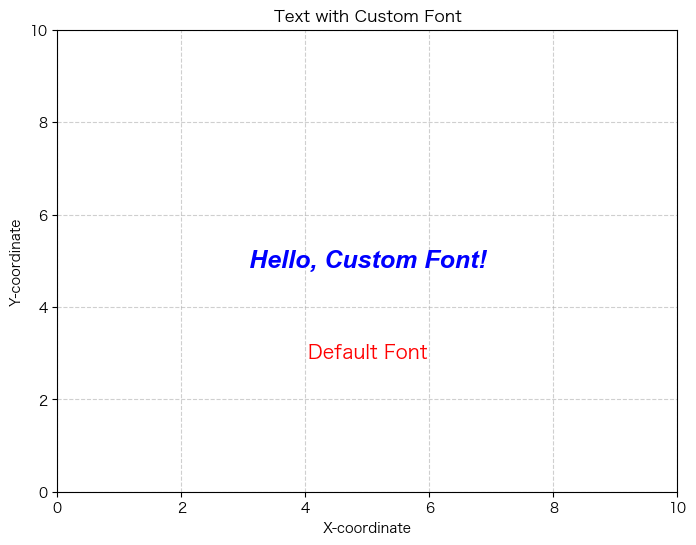

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. Import matplotlib.font_manager module (done above)

# 2. Find available system fonts, filtering for TrueType fonts
# Note: This might take some time depending on the number of fonts on your system.
# We'll limit the search to a small number for demonstration.
system_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(f"Found {len(system_fonts)} TrueType fonts on the system.")

# 3. Select one or more font file paths.
# Let's try to find a common font like 'Arial' or 'DejaVuSans' which is often available.
# If these are not found, we'll just pick the first few fonts found.
selected_fonts = []
for font_path in system_fonts:
    if 'arial' in font_path.lower():
        selected_fonts.append(font_path)
        break # Found Arial, let's use it

# If Arial was not found, try DejaVu Sans
if not selected_fonts:
     for font_path in system_fonts:
        if 'dejavusans' in font_path.lower():
            selected_fonts.append(font_path)
            break # Found DejaVuSans, let's use it

# If neither were found, just take the first available font
if not selected_fonts and system_fonts:
    selected_fonts.append(system_fonts[0])
    print(f"Could not find Arial or DejaVuSans, using first found font: {selected_fonts[0]}")
elif not selected_fonts:
     print("No TrueType fonts found on the system!")


# 4. Create a font properties object for the selected font
if selected_fonts:
    custom_font_path = selected_fonts[0]
    custom_font_prop = fm.FontProperties(fname=custom_font_path)
    print(f"Using font file: {custom_font_path}")

    # 5. & 6. Create a plot and add text with the custom font
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_title('Text with Custom Font')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add text using the custom font properties
    ax.text(5, 5, 'Hello, Custom Font!',
            fontsize=18, color='blue', ha='center', va='center',
            fontproperties=custom_font_prop)

    # Add another text with default font for comparison
    ax.text(5, 3, 'Default Font',
            fontsize=14, color='red', ha='center', va='center')


    # 7. Display the plot
    plt.show()
else:
    print("Cannot proceed as no suitable fonts were found.")


## 保存包含文本的图表

学习如何将包含所有文本元素的图表保存到文件中。


Plots saved as titanic_plot_with_text.png, titanic_plot_with_text.jpg, and titanic_plot_with_text.pdf


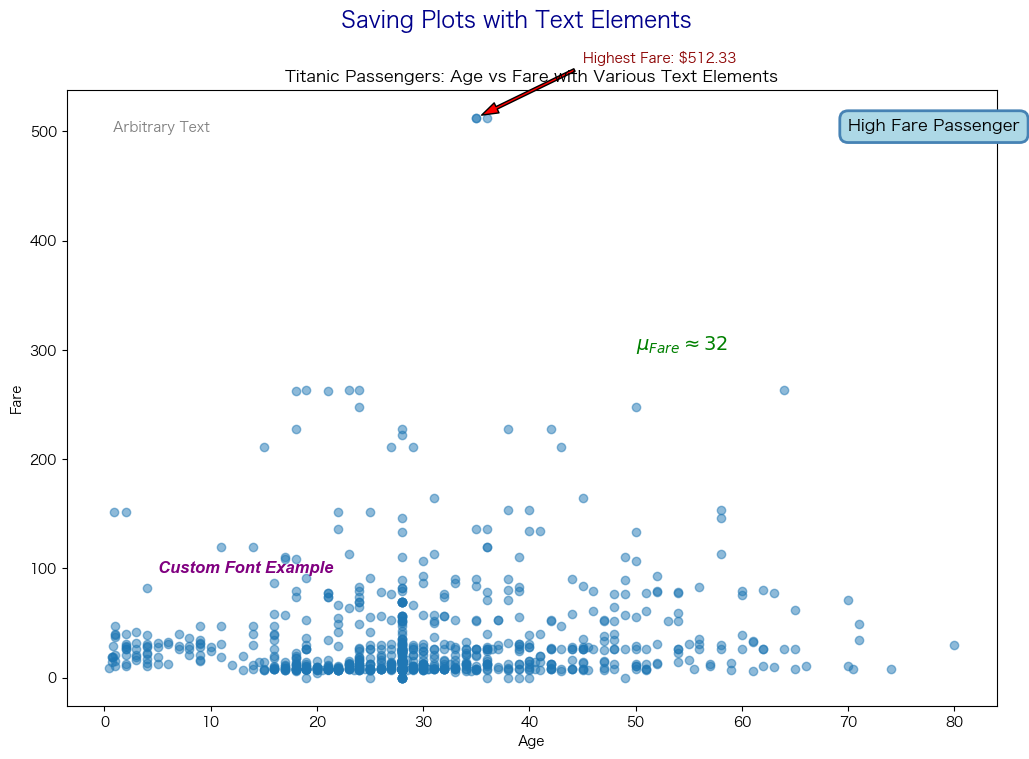

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. Create a new Matplotlib figure and axes object, and plot some example data
fig, ax = plt.subplots(figsize=(12, 8))

# Use Age and Fare data from the Titanic dataset
ax.scatter(df['Age'], df['Fare'], alpha=0.5)

# Set plot labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Titanic Passengers: Age vs Fare with Various Text Elements')

# 2. Add some text elements
# Add a main title to the figure
fig.suptitle('Saving Plots with Text Elements', fontsize=16, color='darkblue')

# Add arbitrary text
ax.text(0.05, 0.95, 'Arbitrary Text', transform=ax.transAxes,
        fontsize=10, color='gray', ha='left', va='top')

# Add text with a textbox
ax.text(70, 500, 'High Fare Passenger',
        fontsize=12, color='black',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', ec='steelblue', lw=2))

# Add an annotation with an arrow (pointing to the highest fare passenger)
highest_fare_passenger = df.loc[df['Fare'].idxmax()]
ax.annotate(f"Highest Fare: ${highest_fare_passenger['Fare']:.2f}",
            xy=(highest_fare_passenger['Age'], highest_fare_passenger['Fare']), # Data point coordinates
            xytext=(highest_fare_passenger['Age'] + 10, highest_fare_passenger['Fare'] + 50), # Text coordinates
            fontsize=10, color='darkred',
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8))

# Add a mathematical expression
ax.text(50, 300, r'$\mu_{Fare} \approx 32$', fontsize=14, color='green')

# Add text with a custom font (if available)
system_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
custom_font_path = None
for font_path in system_fonts:
    if 'arial' in font_path.lower():
        custom_font_path = font_path
        break
if custom_font_path:
    custom_font_prop = fm.FontProperties(fname=custom_font_path)
    ax.text(5, 100, 'Custom Font Example',
            fontsize=12, color='purple', ha='left', va='center',
            fontproperties=custom_font_prop)
else:
    ax.text(5, 100, 'Custom Font Example (Arial not found)',
            fontsize=12, color='purple', ha='left', va='center')


# 3. Use plt.savefig() method to save the chart to a file.
# 4. Try using different file formats (e.g., PNG, JPG, PDF) and different parameters
plt.savefig('titanic_plot_with_text.png', dpi=300, bbox_inches='tight') # PNG format, high resolution, tight bounding box
plt.savefig('titanic_plot_with_text.jpg', dpi=200, bbox_inches='tight') # JPG format, medium resolution, tight bounding box
plt.savefig('titanic_plot_with_text.pdf', bbox_inches='tight') # PDF format, vector graphic, tight bounding box

print("Plots saved as titanic_plot_with_text.png, titanic_plot_with_text.jpg, and titanic_plot_with_text.pdf")

# 5. Display the chart
plt.show()

# Matplotlib 初学教学（小表格数据 + Iris + Wine）

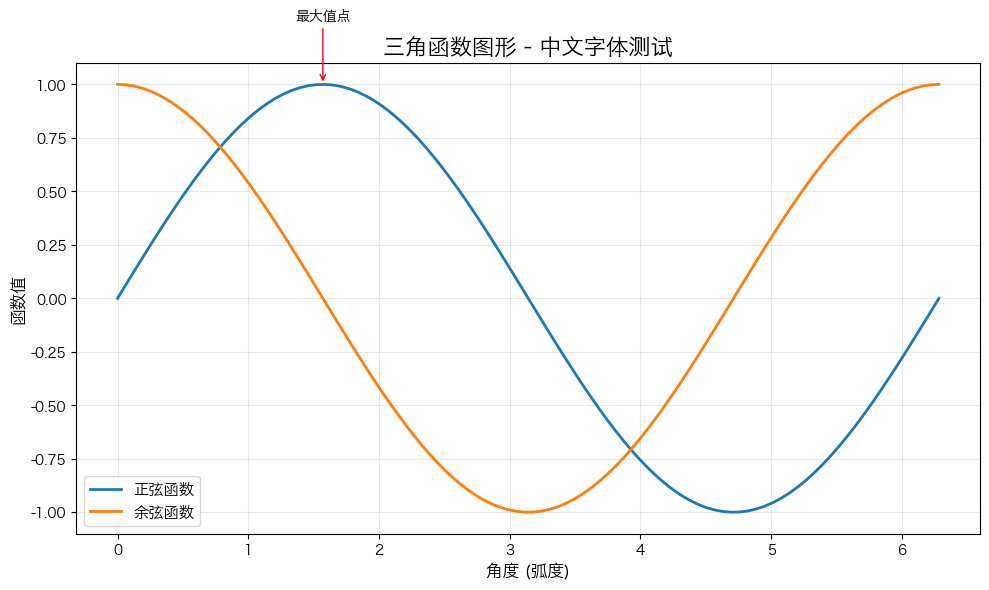

当前字体配置:
font.sans-serif: ['Hiragino Sans GB', 'DejaVu Sans']
axes.unicode_minus: False

如果上图中文正常显示，说明字体配置成功！


In [ ]:
# 测试中文字体显示
import matplotlib.pyplot as plt
import numpy as np

# 创建测试数据
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建测试图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制曲线
ax.plot(x, y1, label='正弦函数', linewidth=2)
ax.plot(x, y2, label='余弦函数', linewidth=2)

# 添加中文标题和标签
ax.set_title('三角函数图形 - 中文字体测试', fontsize=16)
ax.set_xlabel('角度 (弧度)', fontsize=12)
ax.set_ylabel('函数值', fontsize=12)

# 添加图例
ax.legend(fontsize=11)

# 添加网格
ax.grid(True, alpha=0.3)

# 添加中文注释
ax.annotate('最大值点', xy=(np.pi/2, 1), xytext=(np.pi/2, 1.3),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# 显示当前字体设置状态
print("当前字体配置:")
print(f"font.sans-serif: {plt.rcParams['font.sans-serif'][:3]}")
print(f"axes.unicode_minus: {plt.rcParams['axes.unicode_minus']}")
print("\n如果上图中文正常显示，说明字体配置成功！")

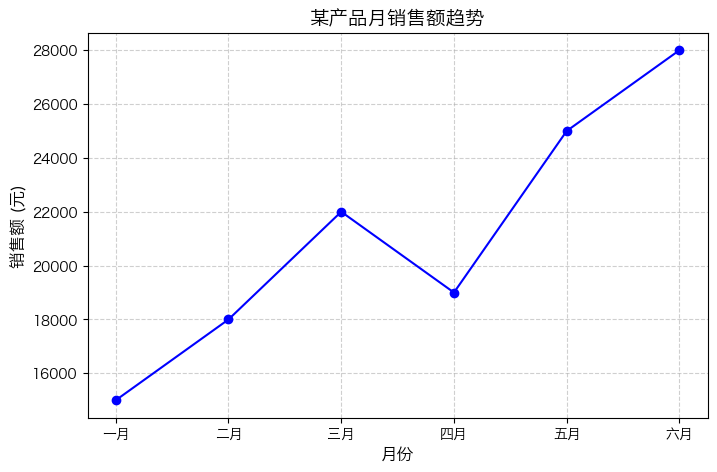

In [ ]:
# 自造小数据：某产品月销售额
months = ['一月', '二月', '三月', '四月', '五月', '六月']
sales = [15000, 18000, 22000, 19000, 25000, 28000]

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制折线图
ax.plot(months, sales, marker='o', linestyle='-', color='blue')

# 添加标题和标签
ax.set_title('某产品月销售额趋势', fontsize=14)
ax.set_xlabel('月份', fontsize=12)
ax.set_ylabel('销售额 (元)', fontsize=12)

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.show()

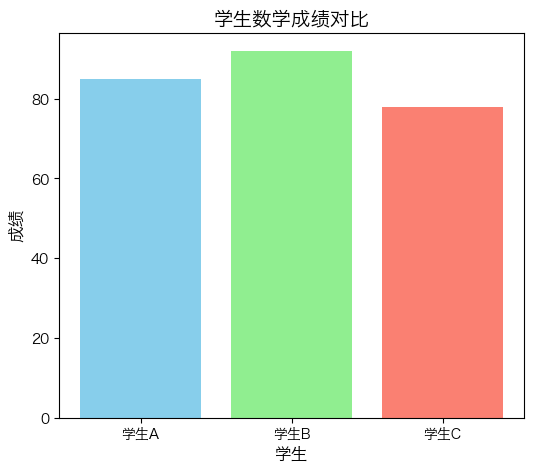

In [ ]:
# 自造小数据：三个学生的数学成绩
students = ['学生A', '学生B', '学生C']
scores = [85, 92, 78]

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(6, 5))

# 绘制柱状图
ax.bar(students, scores, color=['skyblue', 'lightgreen', 'salmon'])

# 添加标题和标签
ax.set_title('学生数学成绩对比', fontsize=14)
ax.set_xlabel('学生', fontsize=12)
ax.set_ylabel('成绩', fontsize=12)

# 显示图表
plt.show()

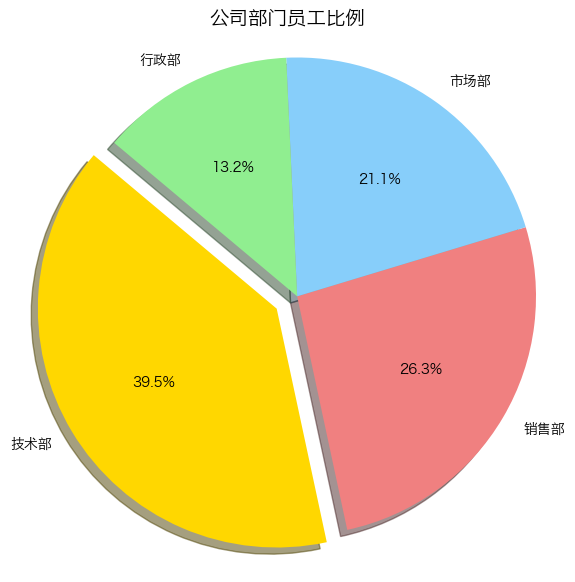

In [ ]:
# 自造小数据：不同部门的员工比例
departments = ['技术部', '销售部', '市场部', '行政部']
employees = [150, 100, 80, 50]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0)  # 突出显示第一个部分

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(7, 7))

# 绘制饼图
wedges, texts, autotexts = ax.pie(employees, explode=explode, labels=departments, colors=colors,
                                  autopct='%1.1f%%', shadow=True, startangle=140)

# 设置标题
ax.set_title('公司部门员工比例', fontsize=14)

# 使饼图呈圆形
ax.axis('equal')

# 显示图表
plt.show()

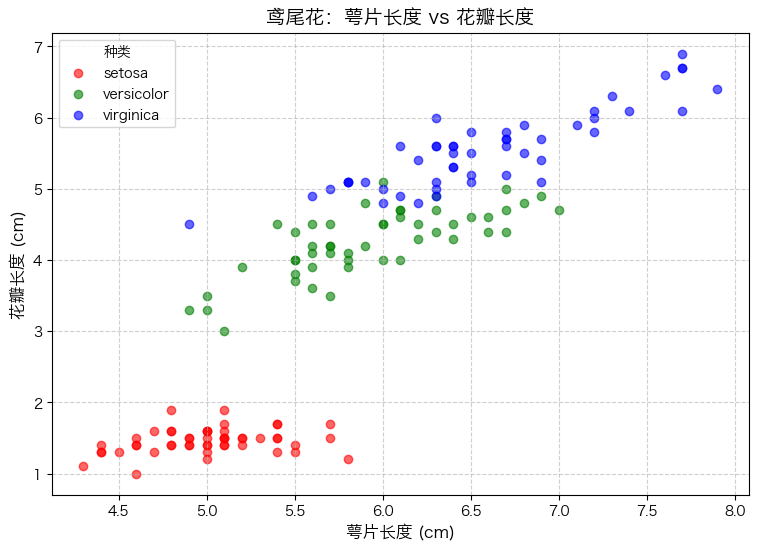

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# 加载 Iris 数据集
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# 将目标值转换为类别名称
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(9, 6))

# 按类别绘制散点图
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species, color in colors.items():
    subset = iris_df[iris_df['target'] == species]
    ax.scatter(subset['sepal length (cm)'], subset['petal length (cm)'],
               c=color, label=species, alpha=0.6)

# 添加标题和标签
ax.set_title('鸢尾花：萼片长度 vs 花瓣长度', fontsize=14)
ax.set_xlabel('萼片长度 (cm)', fontsize=12)
ax.set_ylabel('花瓣长度 (cm)', fontsize=12)
ax.legend(title='种类')

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.show()

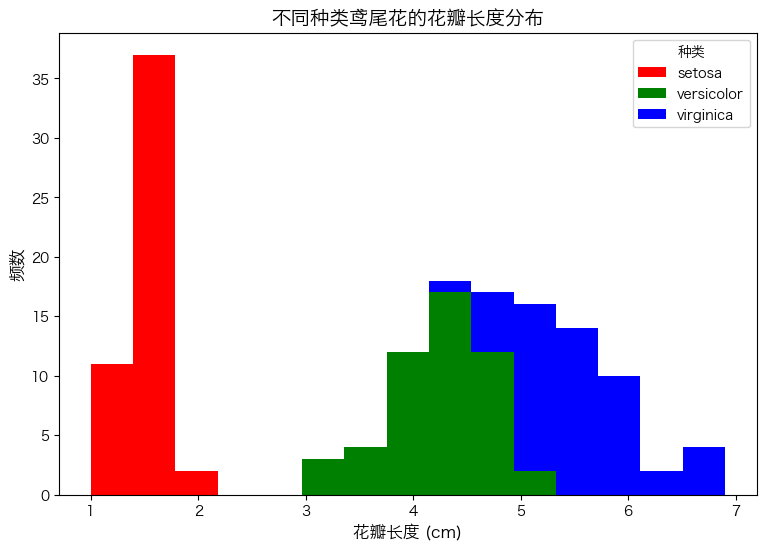

In [ ]:
# 按类别绘制花瓣长度的直方图
fig, ax = plt.subplots(figsize=(9, 6))

# 分离不同种类的花瓣长度数据
setosa_petal_length = iris_df[iris_df['target'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['target'] == 'versicolor']['petal length (cm)']
virginica_petal_length = iris_df[iris_df['target'] == 'virginica']['petal length (cm)']

# 绘制直方图
ax.hist([setosa_petal_length, versicolor_petal_length, virginica_petal_length],
        bins=15, stacked=True, color=['red', 'green', 'blue'],
        label=['setosa', 'versicolor', 'virginica'])

# 添加标题和标签
ax.set_title('不同种类鸢尾花的花瓣长度分布', fontsize=14)
ax.set_xlabel('花瓣长度 (cm)', fontsize=12)
ax.set_ylabel('频数', fontsize=12)
ax.legend(title='种类')

# 显示图表
plt.show()